# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [2]:
import pandas as pd

In [3]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [7]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [4]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')

In [5]:
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [6]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')

In [7]:
df_seoul_moving.head()

,도착 시군구 코드,평균 이동 시간(분)_x,이동인구(합)_x,평균 이동 시간(분)_y,이동인구(합)_y
0,11010,21.867754,46.046219,5471640,1.152145e+07
1,11020,21.524817,46.214336,5368440,1.152618e+07
2,11030,21.820458,38.412082,4959790,8.731066e+06
3,11040,22.150334,44.717847,5139830,1.037646e+07
4,11050,22.810568,50.043326,5020720,1.101479e+07


In [8]:
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [9]:
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [10]:
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분)_x,이동인구(합)_x,평균 이동 시간(분)_y,이동인구(합)_y
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,5471640,1.152145e+07
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,5368440,1.152618e+07
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.412082,4959790,8.731066e+06
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,22.150334,44.717847,5139830,1.037646e+07
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.810568,50.043326,5020720,1.101479e+07


## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1    정류장수와 승차총승객수는 관련이 있다.

* 가설 2    정류장수와 하차총승객수는 관련이 있다.

* 가설 3  정류장수와 평균이동시간은 관련이 있다.

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [17]:
df['하차총승객수'].isnull().sum()

0

In [15]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

### 1)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   도착 시군구 코드      25 non-null     int64  
 1   자치구            25 non-null     object 
 2   정류장수           25 non-null     int64  
 3   노선수            25 non-null     int64  
 4   승차총승객수         25 non-null     int64  
 5   하차총승객수         25 non-null     int64  
 6   승차평균승객수        25 non-null     float64
 7   하차평균승객수        25 non-null     float64
 8   평균 이동 시간(분)_x  25 non-null     float64
 9   이동인구(합)_x      25 non-null     float64
 10  평균 이동 시간(분)_y  25 non-null     int64  
 11  이동인구(합)_y      25 non-null     float64
dtypes: float64(5), int64(6), object(1)
memory usage: 2.5+ KB


In [26]:
df.corr()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분)_x,이동인구(합)_x,평균 이동 시간(분)_y,이동인구(합)_y
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,0.457965,0.639658,0.276925,0.531874
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.199466,0.387141,0.359348,0.370605
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.693565,-0.013633,0.360500,0.188197
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,-0.146534,0.472734,0.572455,0.568742
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,-0.135064,0.460952,0.564608,0.550686
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,-0.410118,-0.080959,0.124998,0.051692
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,-0.387490,-0.076575,0.133859,0.045831
평균 이동 시간(분)_x,0.457965,0.199466,-0.693565,-0.146534,-0.135064,-0.410118,-0.387490,1.000000,0.360419,-0.125621,0.120281
이동인구(합)_x,0.639658,0.387141,-0.013633,0.472734,0.460952,-0.080959,-0.076575,0.360419,1.000000,0.812646,0.963787
평균 이동 시간(분)_y,0.276925,0.359348,0.360500,0.572455,0.564608,0.124998,0.133859,-0.125621,0.812646,1.000000,0.908128


In [12]:
import seaborn as sns

### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [17]:
target = '정류장수'
feature = '승차총승객수'

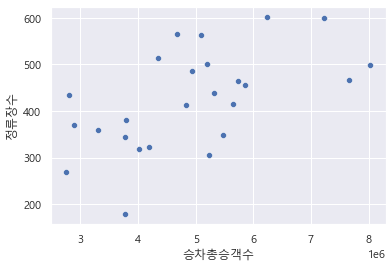

In [18]:
sns.scatterplot(x=feature, y =target, data = df) 
plt.show()

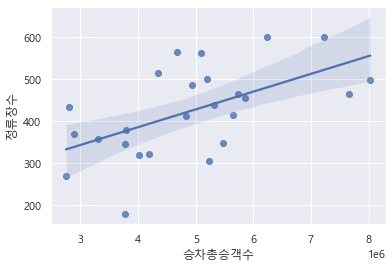

In [36]:
sns.regplot(x=feature, y =target, data = df) 
plt.show()

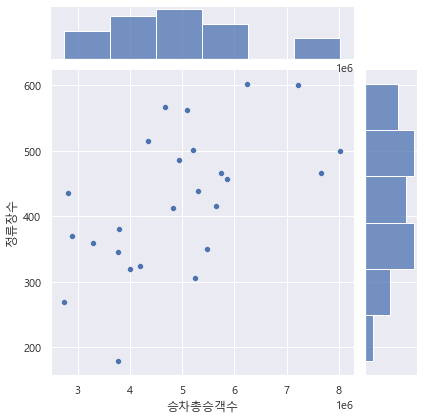

In [38]:
sns.jointplot(x=feature, y =target, data = df)
plt.show()

In [41]:
import scipy.stats as spst

In [42]:
# 상관계수와 p-value 
spst.pearsonr(df[target], df[feature])  # 약한 상관관계를 보인다.(정류장수와 승차총승객수)

(0.5666813370974585, 0.003141977397117322)

In [29]:
# 하차총승객이 높은 정류장 top5
df.sort_values(by = '하차총승객수', ascending = False)[['하차총승객수','정류장수','자치구']].head(5)

,하차총승객수,정류장수,자치구
20,7792476,466,관악구
22,7569213,499,강남구
21,6977950,600,서초구
7,6231238,602,성북구
12,5796960,456,서대문구


In [42]:
feature='평균 이동 시간(분)_y'

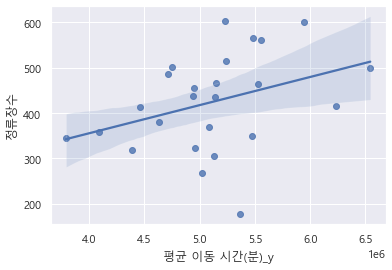

In [43]:
sns.regplot(x=feature, y =target, data = df)
plt.show()

In [44]:
spst.pearsonr(df[target], df[feature])  # 관계가 없다.(정류장수와 평균이동시간)

(0.3593479143752468, 0.07769389116350128)

In [40]:
feature='하차총승객수'

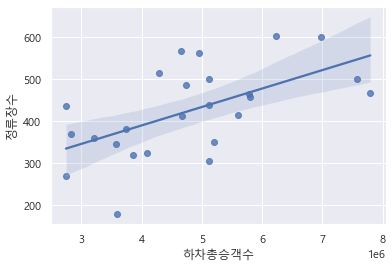

In [41]:
sns.regplot(x=feature, y =target, data = df)
plt.show()

In [47]:
spst.pearsonr(df['정류장수'], df['하차총승객수'])  # 중간정도 상관관계를 보인다.(정류장수와 하차총승객수)

(0.5784790149467576, 0.0024518332034538645)

In [29]:
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분)_x,이동인구(합)_x,평균 이동 시간(분)_y,이동인구(합)_y,승객수/정류장,승객수/노선수
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,21.867754,46.046219,5471640,1.152145e+07,14915.169054,49107.490566
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,21.524817,46.214336,5368440,1.152618e+07,20218.719101,34941.087379
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,21.820458,38.412082,4959790,8.731066e+06,12651.622291,60992.149254
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,22.150334,44.717847,5139830,1.037646e+07,6314.340230,47357.551724
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,22.810568,50.043326,5020720,1.101479e+07,10235.728625,67156.365854


In [25]:
df['승객수/정류장']=df['하차총승객수']/df['정류장수']

In [28]:
df['승객수/노선수']=df['하차총승객수']/df['노선수']

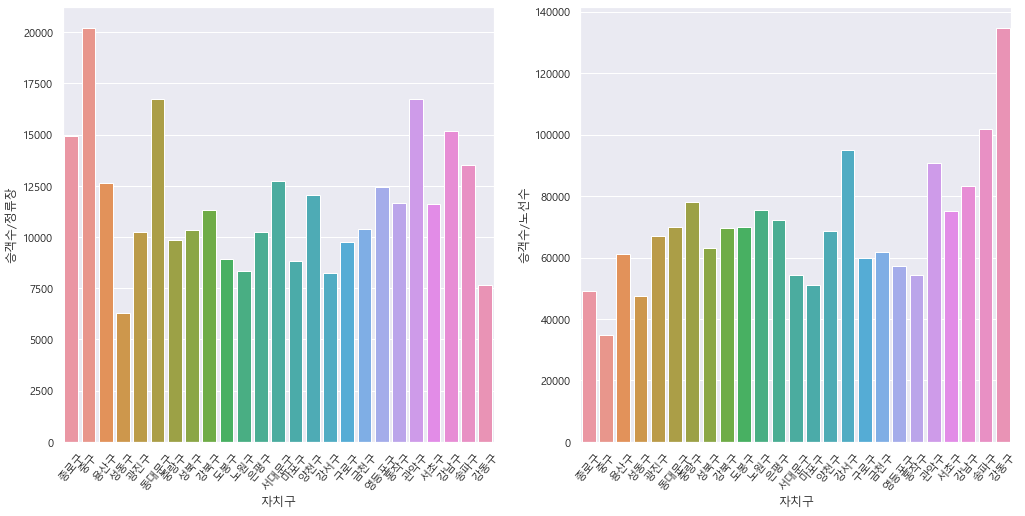

In [37]:
plt.figure(figsize=(17,8))

plt.subplot(1,2,1)
sns.barplot(x='자치구', y ='승객수/정류장', data = df)
plt.xticks(rotation=50)

plt.subplot(1,2,2)
sns.barplot(x='자치구', y ='승객수/노선수', data = df)
plt.xticks(rotation=50)

plt.show()

In [ ]:
spst.pearsonr(df['정류장수'], df['하차총승객수'])  # 중간정도 상관관계를 보인다.(정류장수와 하차총승객수)


df['하차승객/정류장']=df['하차총승객수']/df['정류장수']   # 하차총승객수별 정류장수에 대한 평균 칼럼 추가

plt.figure(figsize=(17,8))

sns.barplot(x='자치구', y ='하차승객/정류장', data = df)
plt.xticks(rotation=50)
plt.show()

### 1)

### 2)

### 3)

## 4.관계 정리

### 1) 강한 관계의 변수

* 승차총승객수/ 하차총승객수

### 2) 약한 관계의 변수

* 평균 이동 시간(분)/ 총이동시간

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

* 정류장당 하차승객수가 많다는 것은 정류장 평균 하차승객이 많다는 의미로 정류장을 늘려주면 평균 하차승객수가 낮아질것임. 하차승객수가 많은 hot place가 모여있는 지역은 정류장을 hot place별로 더 세밀히 늘릴 필요가 있어보임.

* 노선당 하차승객수가 많다는 이유는 노선이 태우는승객수가 많다는 의미이자 정류장수가 많지 않다는 것을 의미합니다. 승객수가 많은 노선에 대해서는 비슷한 노선을 추가하고 중복되는 정류장을 줄이면 노선별 승객수가 줄지 않을까 예상함.